In [1]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [2]:
%cd /content/drive/MyDrive/detascience/space taitanic/

/content/drive/MyDrive/detascience/space taitanic


In [3]:
!pip install optuna
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import optuna

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 365.3/365.3 KB 10.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.2/212.2 KB 15.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.7/78.7 KB 4.4 MB/s eta 0:00:00


In [4]:
dir_path = '/content/drive/MyDrive/detascience/taitanic/'

In [73]:
train = pd.read_csv(dir_path + 'train.csv')
test = pd.read_csv(dir_path + 'test.csv')

In [74]:
train['WhatIsData'] = 'train'
test['WhatIsData'] = 'test'

In [75]:
df = pd.concat([train,test],axis=0)

In [76]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WhatIsData
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,train


In [129]:
Id = test.iloc[:,0:1]

In [78]:
df.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
WhatIsData        0
dtype: int64

In [79]:
df['Age'].min()

0.17

(array([ 72.,  62., 274., 250., 161., 108.,  65.,  41.,  10.,   3.]),
 array([ 0.17 ,  8.153, 16.136, 24.119, 32.102, 40.085, 48.068, 56.051,
        64.034, 72.017, 80.   ]),
 <BarContainer object of 10 artists>)

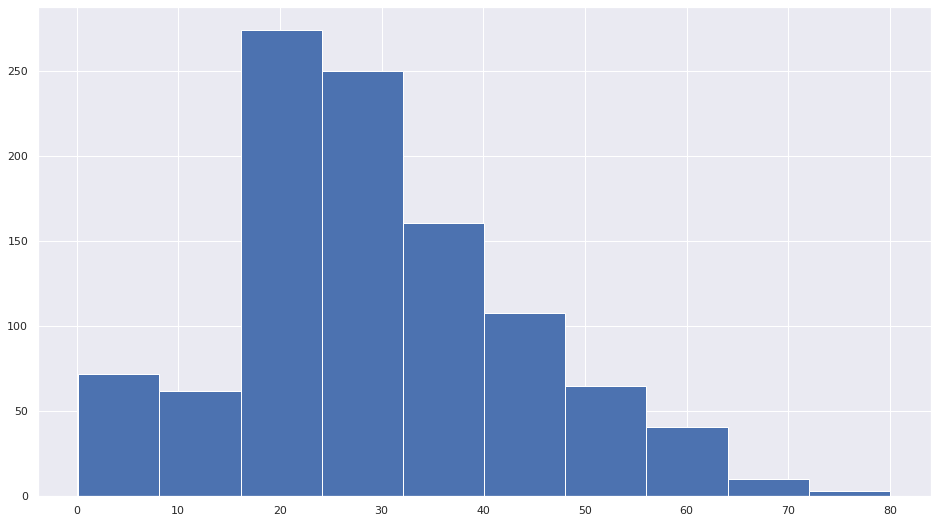

In [80]:
plt.figure(figsize=(16,9))
plt.hist(df['Age'],bins=10)

In [81]:
df.loc[(0<=df['Age'])&(df['Age']<10),'Age'] = 0
df.loc[(10<=df['Age'])&(df['Age']<20),'Age'] = 1
df.loc[(20<=df['Age'])&(df['Age']<30),'Age'] = 2
df.loc[(30<=df['Age'])&(df['Age']<40),'Age'] = 3
df.loc[(40<=df['Age'])&(df['Age']<50),'Age'] = 4
df.loc[(50<=df['Age'])&(df['Age']<60),'Age'] = 5
df.loc[(60<=df['Age'])&(df['Age']<70),'Age'] = 6
df.loc[(70<=df['Age'])&(df['Age']<80),'Age'] = 7
df.loc[(80<=df['Age'])&(df['Age']<90),'Age'] = 8

In [82]:
df['Age'].median()

2.0

In [83]:
df['Age'] =  df['Age'].fillna(2)

In [84]:
df['Age'] = df['Age'].astype(int)

In [85]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,WhatIsData
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2,1,0,A/5 21171,7.2500,NaN,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,PC 17599,71.2833,C85,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,2,0,0,STON/O2. 3101282,7.9250,NaN,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,113803,53.1000,C123,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,3,0,0,373450,8.0500,NaN,S,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,2,0,0,A.5. 3236,8.0500,NaN,S,test
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,3,0,0,PC 17758,108.9000,C105,C,test
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,3,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,test
416,1308,NaN,3,"Ware, Mr. Frederick",male,2,0,0,359309,8.0500,NaN,S,test


In [86]:
df1 = df.drop('Cabin',axis=1)

In [87]:
df2 = df1.drop('Ticket',axis=1)

In [88]:
df2['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [89]:
df2.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,WhatIsData
0,1,0.0,3,"Braund, Mr. Owen Harris",male,2,1,0,7.2500,S,train
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,3,1,0,71.2833,C,train
2,3,1.0,3,"Heikkinen, Miss. Laina",female,2,0,0,7.9250,S,train
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,3,1,0,53.1000,S,train
4,5,0.0,3,"Allen, Mr. William Henry",male,3,0,0,8.0500,S,train


In [90]:
df2['Embarked'] = df2['Embarked'].fillna('S')

In [91]:
df2.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Fare             1
Embarked         0
WhatIsData       0
dtype: int64

(array([ 20., 472., 197.,  69.,  69., 148.,  42.,  28.,   8.,  17.,  32.,
         26.,  11.,  17.,  16.,  24.,  15.,   9.,   4.,   0.,   3.,   7.,
          3.,   4.,   0.,   0.,  13.,   0.,   3.,   9.,   0.,   0.,   4.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   9.,   0.,   4.,
          5.,   0.,   0.,   0.,   3.,   0.,   0.,  13.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          4.]),
 array([  0.      ,   5.123292,  10.246584,  15.369876,  20.493168,
         25.61646 ,  30.739752,  35.863044,  40.986336,  46.109628,
         51.23292 ,  56.356212,  61.479504,  66.602796,  71.726088,
         76.84938 ,  81.972672,  87.095964,  92.219256,  97.342548,
        102.46584 , 107.589132, 112.712424, 11

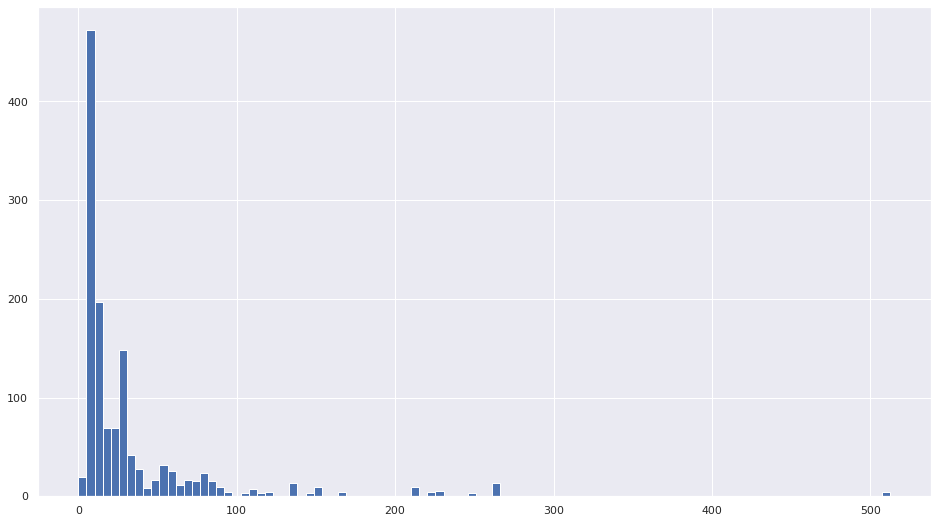

In [92]:
plt.figure(figsize=(16,9))
plt.hist(df['Fare'],bins=100)

In [93]:
df3 = df2.drop('Fare',axis=1)

In [94]:
df4 = df3.drop('Name',axis=1)

In [95]:
df4.isnull().sum()

PassengerId      0
Survived       418
Pclass           0
Sex              0
Age              0
SibSp            0
Parch            0
Embarked         0
WhatIsData       0
dtype: int64

In [96]:
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,WhatIsData
0,1,0.0,3,male,2,1,0,S,train
1,2,1.0,1,female,3,1,0,C,train
2,3,1.0,3,female,2,0,0,S,train
3,4,1.0,1,female,3,1,0,S,train
4,5,0.0,3,male,3,0,0,S,train


In [97]:
df4['Sex'] = pd.get_dummies(df4['Sex']).drop('female',axis=1)

In [98]:
df4.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,WhatIsData
0,1,0.0,3,1,2,1,0,S,train
1,2,1.0,1,0,3,1,0,C,train
2,3,1.0,3,0,2,0,0,S,train
3,4,1.0,1,0,3,1,0,S,train
4,5,0.0,3,1,3,0,0,S,train


In [99]:
df5 = pd.get_dummies(df4['Embarked'])

In [100]:
df6 = pd.concat([df4,df5],axis=1)

In [101]:
df7 = df6.drop('Embarked',axis=1)

In [102]:
df7 = df7.rename(columns={'C':'Embarked C','Q':'Embarked Q','S':'Embarked S'})

In [103]:
train_df = df7.loc[(df['WhatIsData']=='train')]
test_df = df7.loc[(df['WhatIsData']=='test')]

In [104]:
x = train_df.drop('WhatIsData',axis=1)
t = train_df.iloc[:,1:2]

In [105]:
x = x.drop('Survived',axis=1)

In [106]:
x = x.drop('PassengerId',axis=1)

In [107]:
x_test = test_df.drop(['WhatIsData','Survived',],axis=1)

In [108]:
x_test = x_test.drop('PassengerId',axis=1)

In [109]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
import lightgbm as lgb
from sklearn.model_selection import StratifiedKFold

In [110]:
x_train,x_val,t_train,t_val = train_test_split(x,t,test_size=0.3,stratify=t,random_state=0)

In [111]:
lgb_train = lgb.Dataset(x_train,t_train)
lgb_eval = lgb.Dataset(x_val,t_val)

In [112]:
print(x_train.shape,x_val.shape,t_train.shape,t_val.shape)

(623, 8) (268, 8) (623, 1) (268, 1)


In [113]:
def objective(traial):
    params = {'metric':'auc',
              'feature_pre_filter':False,
              'objective':'binary',
              'max_depth':traial.suggest_int('max_depth',5,1000),
              'num_leaves':traial.suggest_int('num_leaves',2,1000),
              'min_child_samples':traial.suggest_int('min_child_samples',1,300),
              'learning_rate':traial.suggest_uniform('learning_rate',0.001,2),}
    
    lgbm = lgb.train(params,
                     lgb_train,
                     valid_sets=lgb_eval,
                     num_boost_round=1000,
                     early_stopping_rounds=10,
                     verbose_eval=False)
    
    return metrics.accuracy_score(t_val['Survived'],np.round(lgbm.predict(x_val)))

In [ ]:
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=1000)

In [115]:
study.best_params,study.best_value

({'max_depth': 384,
  'num_leaves': 606,
  'min_child_samples': 14,
  'learning_rate': 1.3365721527619638},
 0.8544776119402985)

In [ ]:
bestparams = {'metric':'auc',
              'objective':'binary',
              'max_depth':study.best_params['max_depth'],
              'num_leaves':study.best_params['num_leaves'],
              'min_child_samples':study.best_params['min_child_samples'],
              'learning_rate':study.best_params['learning_rate']}
    
best_lgbm = lgb.train(bestparams,
                     lgb_train,
                     valid_sets=lgb_eval,
                     num_boost_round=20,
                     early_stopping_rounds=50)

In [117]:
print(metrics.accuracy_score(t_train['Survived'],np.round(best_lgbm.predict(x_train))))
print(metrics.accuracy_score(t_val['Survived'],np.round(best_lgbm.predict(x_val))))

0.8651685393258427
0.8544776119402985


In [122]:
pred = np.round(best_lgbm.predict(x_test))

In [124]:
df_predict = pd.DataFrame(pred,columns=['Survived'])

In [131]:
predict = pd.concat([Id,df_predict],axis=1)

In [132]:
predict['Survived'] = predict['Survived'].astype(int)

In [134]:
predict = predict.set_index('PassengerId')

In [137]:
predict.to_csv('submission.csv')